In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor

### Import data set

In [3]:
diabetes = load_diabetes()

df = pd.DataFrame(diabetes['data'])
df.columns = diabetes['feature_names']
df['target'] = diabetes['target']

X = df.drop(columns= ['target'])

### Instantiate and fit a Random Forest Regressor

In [4]:
rf_default = RandomForestRegressor(n_estimators= 100, max_features= 0.3, min_samples_leaf= 25, random_state= 303)
rf_default.fit(X= X, y= df.target)

RandomForestRegressor(max_features=0.3, min_samples_leaf=25, random_state=303)

### Visualize a sample of the trees

[27 14 37]


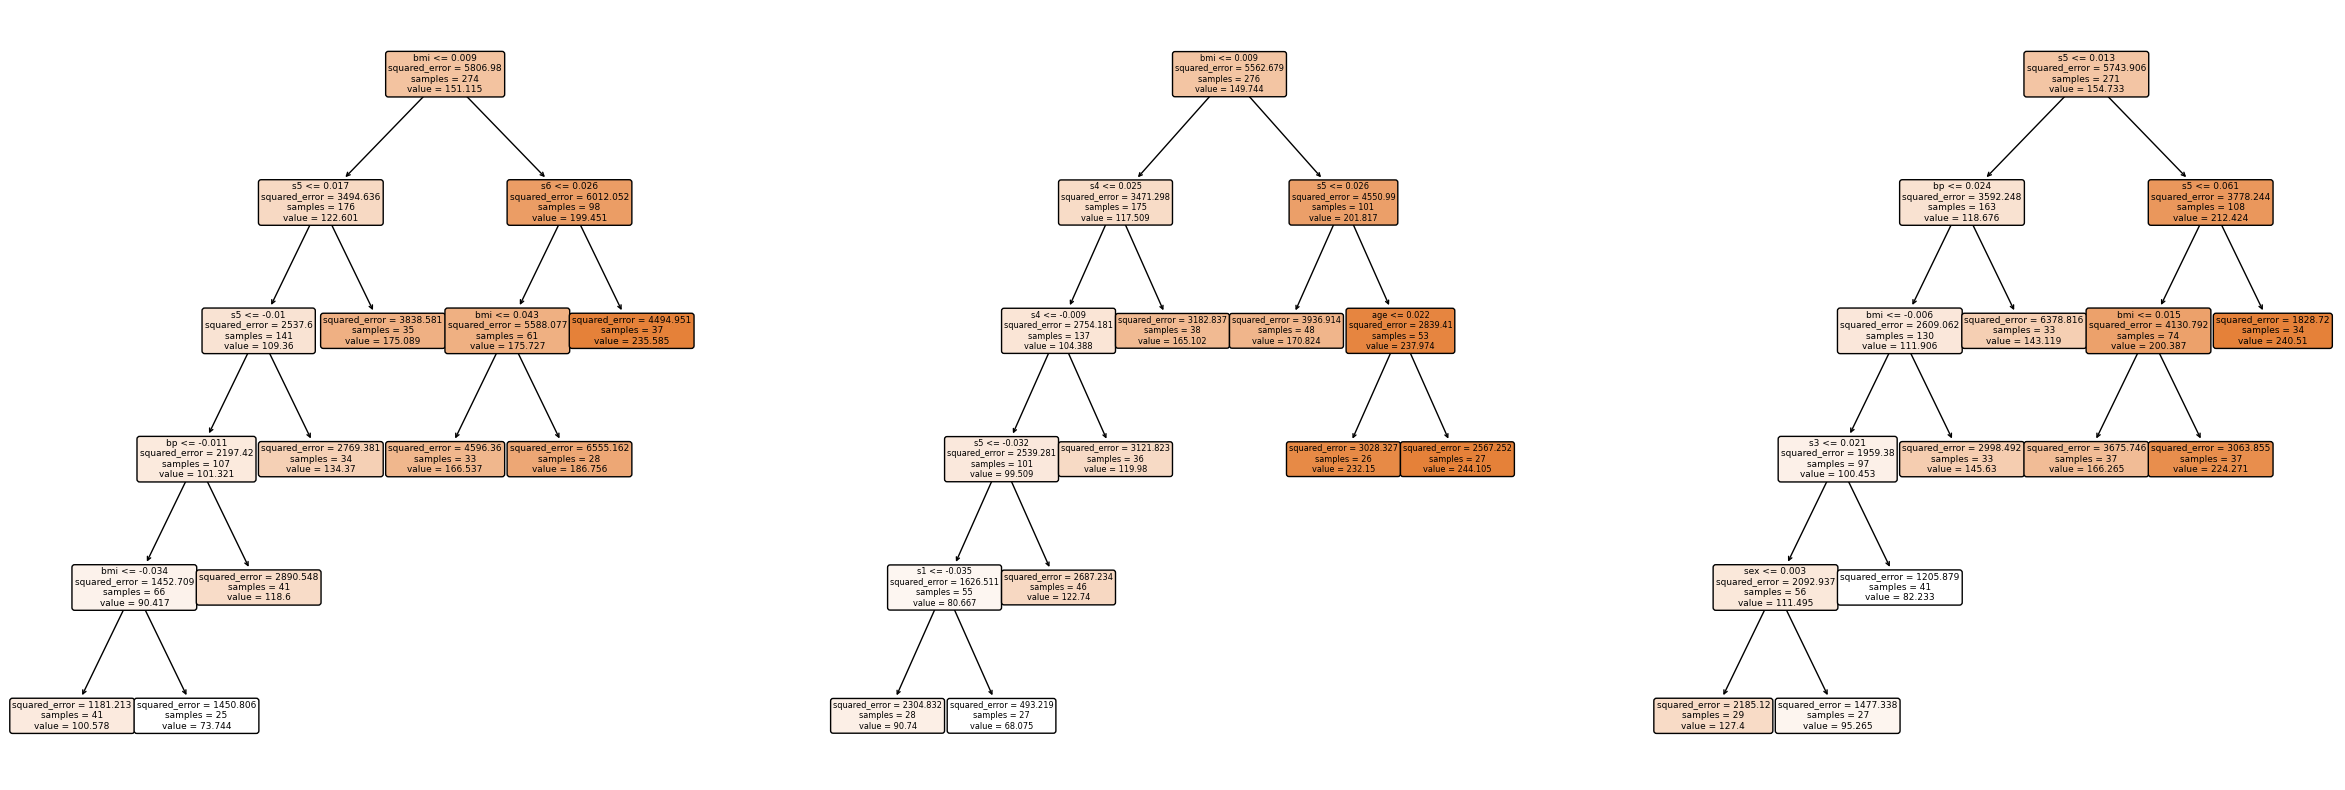

In [5]:
from sklearn import tree

random_index = np.random.randint(rf_default.get_params()['n_estimators'], size= 3)
print(random_index)

fig, (ax0, ax1, ax2) = plt.subplots(nrows= 1, ncols= 3, figsize= (30, 10))

tree.plot_tree(decision_tree= rf_default.estimators_[random_index[0]], 
               feature_names= X.columns, 
               rounded= True, 
               filled= True, 
               ax= ax0)
tree.plot_tree(decision_tree= rf_default.estimators_[random_index[1]], 
               feature_names= X.columns, 
               rounded= True, 
               filled= True, 
               ax= ax1)
tree.plot_tree(decision_tree= rf_default.estimators_[random_index[2]], 
               feature_names= X.columns, 
               rounded= True, 
               filled= True, 
               ax= ax2)
plt.show()

### Make predictions with the Random Forest

In [6]:
tree_predictions = pd.DataFrame()
tree_importances = pd.DataFrame()
tree_depths = np.array([])

for _tree in range(len(rf_default.estimators_)):
    tree_predictions[f'tree_{_tree}'] = rf_default.estimators_[_tree].predict(X.values)
    tree_importances[f'tree_{_tree}'] = rf_default.estimators_[_tree].feature_importances_
    tree_depths = np.append(tree_depths, rf_default.estimators_[_tree].get_depth())
    
tree_importances.index = (list(X.columns))
print(f'The average over all trees matches the forest prediction: {np.array_equal(np.array(tree_predictions.mean(axis= 1)), rf_default.predict(X))}')

The average over all trees matches the forest prediction: True


In [7]:
tree_predictions

,tree_0,tree_1,tree_2,tree_3,tree_4,tree_5,tree_6,tree_7,tree_8,tree_9,...,tree_90,tree_91,tree_92,tree_93,tree_94,tree_95,tree_96,tree_97,tree_98,tree_99
0,177.194444,162.071429,167.718310,207.875000,169.660000,129.419355,167.086207,254.322034,151.465116,179.921053,...,148.263158,217.457143,203.945455,165.705882,209.075000,258.487179,184.147541,212.625000,193.677419,146.955882
1,76.319149,83.160000,83.648148,98.400000,79.216216,76.975000,77.886364,76.666667,83.490196,90.463768,...,86.800000,97.236111,82.627119,81.295455,83.952381,85.637681,93.742424,93.760563,76.409091,81.333333
2,177.194444,162.071429,167.718310,152.758621,129.574468,129.419355,167.086207,254.322034,151.465116,153.444444,...,148.263158,183.847458,203.945455,165.705882,209.075000,166.333333,184.147541,212.625000,137.333333,146.955882
3,137.542373,162.071429,158.161290,152.758621,204.717949,141.744186,163.770833,176.942029,139.140625,179.921053,...,249.404255,167.662500,144.658537,189.274510,186.384615,166.333333,141.934783,174.600000,132.675000,146.795918
4,127.651163,139.666667,113.178571,127.234375,110.341463,111.698113,102.830986,140.226415,117.037736,115.369565,...,133.815789,114.671429,82.627119,105.038462,103.904762,124.372093,93.742424,93.760563,193.677419,111.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,218.260870,216.904762,216.600000,238.720000,238.982143,195.187500,251.477273,176.942029,151.465116,233.509804,...,231.122449,217.457143,203.945455,189.644444,209.075000,210.600000,184.147541,212.625000,151.395833,198.583333
438,137.542373,120.163934,158.161290,120.032967,110.341463,141.744186,163.770833,128.571429,231.104478,153.444444,...,167.127273,114.671429,148.488372,155.051282,103.904762,114.826087,141.934783,155.019608,169.728814,200.666667
439,137.542373,139.666667,124.517241,127.234375,79.216216,103.800000,167.086207,128.571429,117.037736,153.444444,...,106.920635,97.236111,105.714286,81.295455,83.952381,114.826087,98.306122,155.019608,151.395833,84.787234
440,218.260870,216.904762,167.718310,186.826087,204.717949,191.980000,163.770833,254.322034,170.972973,179.921053,...,249.404255,217.457143,203.945455,189.274510,186.384615,166.333333,184.147541,212.625000,137.333333,146.955882


### Feature Importances

In [8]:
tree_importances

,tree_0,tree_1,tree_2,tree_3,tree_4,tree_5,tree_6,tree_7,tree_8,tree_9,...,tree_90,tree_91,tree_92,tree_93,tree_94,tree_95,tree_96,tree_97,tree_98,tree_99
age,0.000000,0.000000,0.004926,0.000000,0.026695,0.000000,0.014805,0.000000,0.000000,0.000000,...,0.003267,0.000000,0.000000,0.000000,0.000000,0.012108,0.000000,0.000000,0.000000,0.000000
sex,0.030721,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016193,0.009718,0.000000,...,0.000000,0.000000,0.000000,0.008265,0.000000,0.000000,0.000000,0.000000,0.000000,0.004654
bmi,0.233098,0.000000,0.788281,0.338681,0.030878,0.057900,0.000000,0.276952,0.031353,0.128166,...,0.000000,0.255058,0.217290,0.739845,0.077312,0.199499,0.733975,0.120249,0.004476,0.066425
bp,0.000000,0.043303,0.016698,0.318343,0.041316,0.660639,0.640924,0.010452,0.139535,0.498428,...,0.199132,0.000000,0.000000,0.062552,0.000000,0.059825,0.003391,0.149518,0.532658,0.221360
s1,0.064869,0.000000,0.000000,0.000000,0.032129,0.000000,0.064413,0.000000,0.108554,0.000000,...,0.000000,0.000000,0.010217,0.014555,0.009954,0.000000,0.012511,0.000000,0.000000,0.000000
s2,0.000000,0.000000,0.000000,0.000000,0.000000,0.031009,0.000000,0.000000,0.000000,0.000000,...,0.042874,0.009082,0.000000,0.000000,0.010366,0.000000,0.000000,0.000000,0.024616,0.000000
s3,0.072455,0.000000,0.000000,0.000000,0.000000,0.000000,0.212548,0.432709,0.019180,0.192573,...,0.000000,0.063689,0.000000,0.047433,0.037094,0.282404,0.000000,0.127579,0.000000,0.095395
s4,0.000000,0.029097,0.116984,0.000000,0.000000,0.250451,0.000000,0.000000,0.184064,0.000000,...,0.619709,0.013993,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
s5,0.598858,0.804990,0.000000,0.342976,0.868982,0.000000,0.067310,0.263694,0.000000,0.180834,...,0.126265,0.658178,0.408956,0.127350,0.753638,0.446164,0.133204,0.602653,0.126019,0.132251
s6,0.000000,0.122610,0.073112,0.000000,0.000000,0.000000,0.000000,0.000000,0.507595,0.000000,...,0.008753,0.000000,0.363537,0.000000,0.111637,0.000000,0.116918,0.000000,0.312231,0.479915


In [9]:
tree_importances.mean(axis= 1)

age    0.010901
sex    0.006909
bmi    0.244135
bp     0.148201
s1     0.019759
s2     0.008862
s3     0.072683
s4     0.084981
s5     0.333039
s6     0.070530
dtype: float64

In [10]:
dict(zip(X.columns, 
         np.round(rf_default.feature_importances_, 6)))

{'age': 0.010901,
 'sex': 0.006909,
 'bmi': 0.244135,
 'bp': 0.148201,
 's1': 0.019759,
 's2': 0.008862,
 's3': 0.072683,
 's4': 0.084981,
 's5': 0.333039,
 's6': 0.07053}

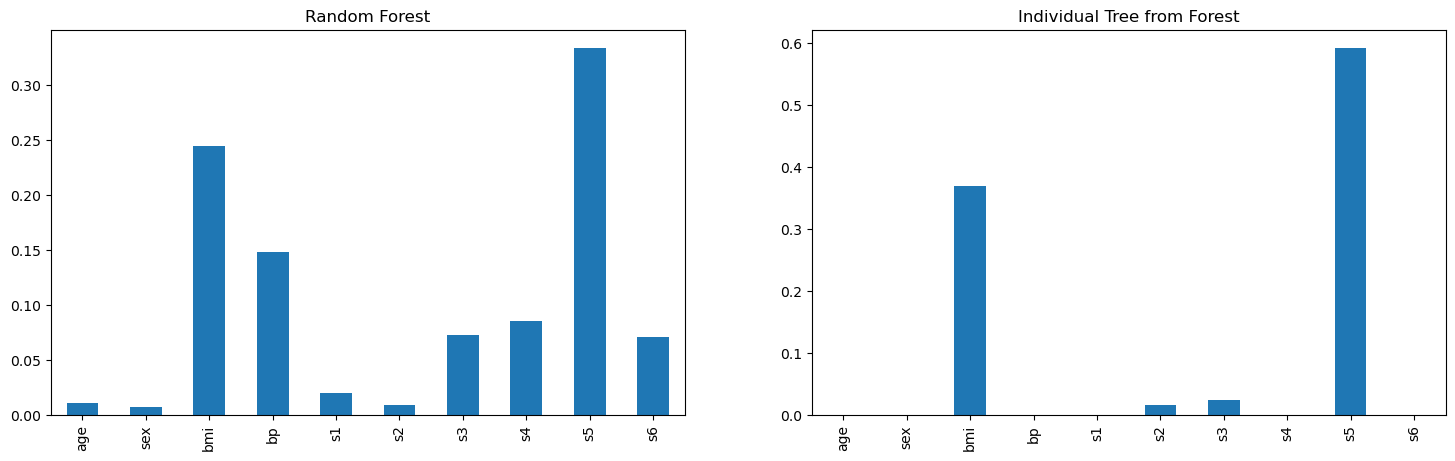

In [11]:
fig, (ax1, ax2) = plt.subplots(nrows= 1, ncols= 2, figsize= (18, 5))
tree_importances.mean(axis= 1).plot(kind= 'bar', ax= ax1)
ax1.set_title('Random Forest')
pd.Series(rf_default.estimators_[np.random.randint(len(rf_default.estimators_))].feature_importances_, index= X.columns).plot(kind= 'bar', ax= ax2)
ax2.set_title('Individual Tree from Forest')
plt.show()

## Out of Bag Sampling Example

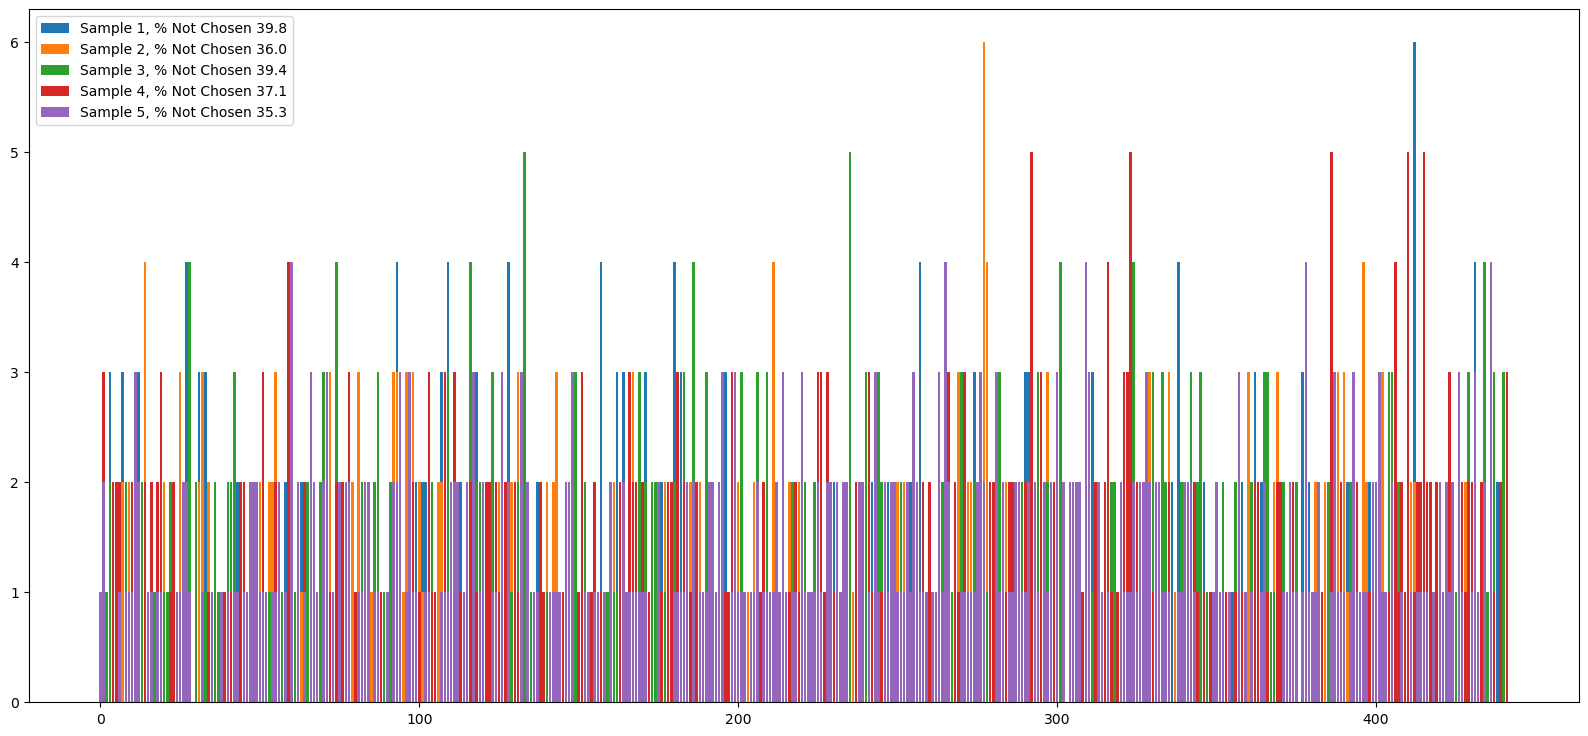

In [12]:
indices = X.index
fig = plt.figure(figsize= (20, 9))
for i in range(5):
    sampled_idx, counts_idx = np.unique(np.random.choice(indices, len(indices)), return_counts= True)
    plt.bar(sampled_idx, counts_idx, label= f'Sample {i + 1}, % Not Chosen {np.round((1 - (len(sampled_idx) / len(indices))) * 100, 1)}')
plt.legend()
plt.show()